In [1]:
###############1.线性可分/硬间隔最大化####################
#==================== Part 0: Basic Function ====================
import numpy as np

x = np.array([[1.1,2],[4,3],[2,2],[3.3,2.5],[1,1],[2.5,1.5],[3.5,1.5],[2.9,2.8],[2.2,1.7]])
y= np.array([-1,1,-1,1,-1,-1,1,1,-1])
m=len(y)
y= y.reshape((m,1))
x= x.reshape((m,2))

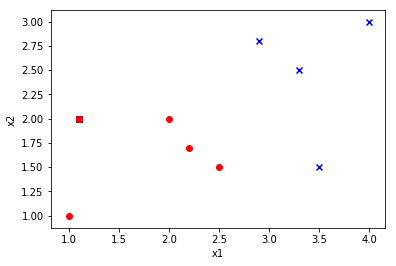

In [2]:
#%% ==================== Part 1: Plotting ====================
#We start the exercise by first plotting the data to understand the the problem we are working with.
import matplotlib.pyplot as plt

def plotData(x,y):
    fig = plt.figure()  
    ax= fig.add_subplot(111) #使画在一个图上
    
    pos = np.where(y[:]==1) #y为类似矩阵形式，所以要再取第一列
    neg = np.where(y[:]==-1)
    ax1 = plt.scatter(x[pos,0], x[pos,1], marker = 'x', color = 'b')  
    ax2 = plt.scatter(x[neg,0], x[neg,1], marker = 'o', color = 'r')  
    plt.xlabel('x1') 
    plt.ylabel('x2')
    plt.show()

plotData(x,y)

In [13]:
#============ Part 2: Compute ============

class SVM(object):
    def __init__(self):
        self.x = 0
        self.y = 0
        self.w = 0
        self.b = 0
        
    def fit(self,x,y):
        self.x = x
        self.y = y
        alpha = self.SMO(x,y)
        self.w = np.sum(alpha*y*x,axis=0)
        return
    
    def Kernel(self,x1,x2,kernel='GS'):
        if kernel == 'GS':
            return x1.dot(x2.T)
        
    def clipAlpha(self,z,C,yi,yj,ai,aj):
        if yi!=yj:
            L=max(0,aj-ai)
            H=min(C,C+aj-ai)
        else:
            L=max(0,aj+ai-C)
            H=min(C,aj+ai)
        if z<L:
            z = L
        if z>H:
            z= H
        return z
    
    def g_func(self,alpha,i):
        g = float(np.sum(alpha*self.y*self.Kernel(self.x,self.x[i])))+self.b
        return g
    
    def error_y(self,alpha,i):
        error = self.g_func(alpha,i) - self.y[i][0]
        return error
    
    def selectJ(self,m,i):
        #测试简化版，随机选择J
        j = i
        while (j==i):
            j=int(np.random.uniform(0,m))
        return j
        '''
        final_j = 0
        maxE=0
        for j in range(m):
            E[j] = self.error_y(alpha,j)

            if i!=j and np.abs(E[i]-E[j])>maxE:
                final_j = j
                maxE = np.abs(E[i]-E[j])
        if final_j == 0:
            continue
        '''
        
    def SMO(self,x,y,C=0.1,maxIter=20):
        m,n=x.shape
        alpha = np.zeros((m,1)) 
        E = np.zeros((m,1)) 
        b=0
        iter = 0
        while iter<maxIter:
            alphaChanged = 0
            for i in range(m):
                if (alpha[i]==0 and y[i]*self.g_func(alpha,i)>=1) or (alpha[i]>0 and alpha[i]<C and y[i]*self.g_func(alpha,i)==1)\
                    or (alpha[i]==C and y[i]*self.g_func(alpha,i)<=1):
                    continue

                E[i] = self.error_y(alpha,i)
#                toler=0.001
#                 if not (((y[i]*E[i]<-toler) and (alpha[i]<C)) or((y[i]*E[i]>toler) and (alpha[i]>0))):
#                     continue
                j = self.selectJ(m,i)   
                E[j] = self.error_y(alpha,j)
                
                eta = (self.Kernel(x[i],x[i])+self.Kernel(x[j],x[j])-2*self.Kernel(x[i],x[j]))
                if eta<=0:
                    print('eta<=0')
                    continue
                alpha_j_unclip=alpha[j]+y[j]*(E[i]-E[j])/eta
                alphaj_old = alpha[j]
                alpha[j] = self.clipAlpha(alpha_j_unclip,C,y[i],y[j],alpha[i],alpha[j])
                alphai_old = alpha[i]
                alpha[i] = alpha[i]+y[i]*y[j]*(alphaj_old-alpha[j])
                
                b1 = b-E[i]-y[i]*self.Kernel(x[i],x[i])*(alpha[i]-alphai_old) - y[j]*self.Kernel(x[j],x[i])*(alpha[j]-alphaj_old)
                b2 = b-E[j]-y[i]*self.Kernel(x[i],x[j])*(alpha[i]-alphai_old) - y[j]*self.Kernel(x[j],x[j])*(alpha[j]-alphaj_old)
                if 0<alpha[i] and alpha[i]<C:
                    b=b1
                elif 0<alpha[j] and alpha[j]<C:
                    b=b2
                else:
                    b = (b1+b2)/2.0
                
                self.b=b
                alphaChanged+=1
                print('MID: Ei: %d , Ej: %d , b1: %d , b2: %d' % (E[i],E[j],b1,b2))
                print('alpha:' , alpha.reshape((1,m)))
                print("iter: %d i:%d,pairsChanged %d " % (iter,i,alphaChanged))
                print('-------------------------------')
                
            if alphaChanged==0:#没有α改变时最多遍历maxIter次数据集
                iter+=1
            else:
                iter=0

        return alpha

model = SVM()
model.fit(x,y)

print(model.w,model.b)


MID: Ei: 1 , Ej: 1 , b1: -1 , b2: -1
alpha: [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.]]
iter: 0 i:0,pairsChanged 1 
-------------------------------
MID: Ei: -2 , Ej: -2 , b1: 1 , b2: 1
alpha: [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.]]
iter: 0 i:1,pairsChanged 2 
-------------------------------
MID: Ei: 2 , Ej: 0 , b1: -1 , b2: 1
alpha: [[ 0.   0.   0.   0.   0.   0.   0.   0.1  0. ]]
iter: 0 i:2,pairsChanged 3 
-------------------------------
MID: Ei: 5 , Ej: 9 , b1: -5 , b2: -9
alpha: [[ 0.   0.   0.   0.   0.   0.   0.   0.1  0. ]]
iter: 0 i:4,pairsChanged 4 
-------------------------------
MID: Ei: 2 , Ej: 2 , b1: -9 , b2: -9
alpha: [[ 0.   0.   0.   0.   0.   0.   0.   0.1  0. ]]
iter: 0 i:5,pairsChanged 5 
-------------------------------
MID: Ei: 1 , Ej: -4 , b1: -10 , b2: -5
alpha: [[ 0.   0.   0.   0.   0.   0.   0.   0.1  0. ]]
iter: 0 i:7,pairsChanged 6 
-------------------------------
MID: Ei: 1 , Ej: 1 , b1: -9 , b2: -9
alpha: [[ 0.   0.   0.   0.   0.   0.   0.   0.1  0. ]]
iter: 

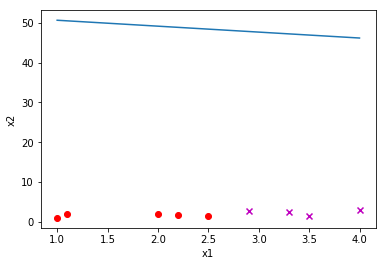

In [14]:
#%% ============= Part 3: Visualizing J(theta_0, theta_1) =============
def plotPerc(pre_theta,pre_b,X,y):
    fig = plt.figure()  
    ax= fig.add_subplot(111) #使画在一个图上
    
    pos = np.where(y[:,0]==1) #y为类似矩阵形式，所以要再取第一列
    neg = np.where(y[:,0]==-1)
    
    ax1 = plt.scatter(x[pos,0], x[pos,1], marker = 'x', color = 'm')  
    ax2 = plt.scatter(x[neg,0], x[neg,1], marker = 'o', color = 'r')  
    
    plt.xlabel('x1') 
    plt.ylabel('x2')
    
    plotX = np.arange(1,5,1)
    plotY = (-pre_b-pre_theta[0]*plotX)/pre_theta[1]
    plt.plot(plotX,plotY)
    
    plt.show()

plotPerc(model.w,model.b,x,y)

b值总是偏差很大

按照算法流程一一对照写的，同时也参考了机器学习实战，但是不知道为什么结果就是不对.....先放着吧...